In [1]:
import numpy as np
import math
import random
import os

import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.optimizers as opt
import tensorflow.keras.layers as lr
import tensorflow.keras.metrics as metrics
from   tensorflow.keras.models import Sequential

import sklearn as sk
import matplotlib.pyplot as plt
#%matplotlib inline

print("Imported packages.")
print(tf.__version__)

Imported packages.
2.1.0


In [2]:
X_data = np.load(os.path.join("data", "MergedData", "InputData.npy"))
Y_data = np.load(os.path.join("data", "MergedData", "OutputData.npy"))
print("Toaded training data.")
print("X_data shape:", X_data.shape)
print("Y_data shape:", Y_data.shape)
assert X_data.shape[0] == Y_data.shape[0], "Not the same amount of input and output data."

Toaded training data.
X_data shape: (3528, 56)
Y_data shape: (3528,)


In [3]:
X_data, Y_data = sk.utils.shuffle(X_data, Y_data, random_state=0)
print("Shuffled data.")

Shuffled data.


In [4]:
TRAIN_PROPORTION = 0.8
split_index = int((len(X_data)-1)*TRAIN_PROPORTION)
splited_X_data = np.split(X_data, [split_index, len(X_data)])
splited_Y_data = np.split(Y_data, [split_index, len(Y_data)])

X_train, X_test = splited_X_data[0], splited_X_data[1]
Y_train, Y_test = splited_Y_data[0], splited_Y_data[1]

# Cleaning uneccessary variables
del splited_X_data
del splited_Y_data
del split_index
del TRAIN_PROPORTION

print("Splitted data into training and testing sets.")
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

Splitted data into training and testing sets.
X_train shape: (2821, 56)
Y_train shape: (2821,)
X_test shape: (707, 56)
Y_test shape: (707,)


In [5]:
def create_model(input_shape, output_shape):
    model = Sequential([
        lr.Dense(units=input_shape, activation='relu', input_dim=input_shape),
        lr.Flatten(),
        lr.Dropout(0.2),
        lr.Dense(units=56, activation='relu'),
        lr.Dropout(0.2),
        lr.Dense(units=28, activation='relu'),
        lr.Dropout(0.2),
        lr.Dense(units=14, activation='relu'),
        lr.Dropout(0.2),
        lr.Dense(units=7, activation='relu'),
        lr.Dense(units=output_shape, activation='tanh')
    ])

    model.compile(optimizer=opt.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0000001),
              loss="mean_absolute_error",
              metrics=['accuracy'])
    return model

In [6]:
model = create_model(X_train[0].shape[0], 1)

In [7]:
NB_EPOCHS = 2500
BATCH_SIZE = 750

In [8]:
# Training Model on GPU if available
list_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(list_devices))
print("Using GPU: ", list_devices[0])

Num GPUs Available:  1
Using GPU:  PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [9]:
# Training model_tilte_1
device = tf.device('/GPU:0') if len(list_devices) > 0 else tf.device('/CPU:0')
with device:
    history = model.fit(X_train, Y_train,
                        epochs=NB_EPOCHS, batch_size=BATCH_SIZE,
                        validation_data=(X_test, Y_test),
                        callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss',
                                                        patience=1000,
                                                        restore_best_weights=True)])

Train on 2821 samples, validate on 707 samples
Epoch 1/2500
2821/2821 [==============================] - 1s 246us/sample - loss: 0.4928 - accuracy: 3.5448e-04 - val_loss: 0.3927 - val_accuracy: 0.0014
Epoch 2/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.4333 - accuracy: 0.0014 - val_loss: 0.3953 - val_accuracy: 0.0014
Epoch 3/2500
2821/2821 [==============================] - 0s 7us/sample - loss: 0.4108 - accuracy: 3.5448e-04 - val_loss: 0.3944 - val_accuracy: 0.0014
Epoch 4/2500
2821/2821 [==============================] - 0s 7us/sample - loss: 0.4109 - accuracy: 3.5448e-04 - val_loss: 0.3933 - val_accuracy: 0.0014
Epoch 5/2500
2821/2821 [==============================] - 0s 8us/sample - loss: 0.4048 - accuracy: 3.5448e-04 - val_loss: 0.3919 - val_accuracy: 0.0014
Epoch 6/2500
2821/2821 [==============================] - 0s 8us/sample - loss: 0.3980 - accuracy: 3.5448e-04 - val_loss: 0.3900 - val_accuracy: 0.0014
Epoch 7/2500
2821/2821 [===================

2821/2821 [==============================] - 0s 5us/sample - loss: 0.2710 - accuracy: 0.0018 - val_loss: 0.2583 - val_accuracy: 0.0014
Epoch 56/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.2691 - accuracy: 0.0014 - val_loss: 0.2589 - val_accuracy: 0.0014
Epoch 57/2500
2821/2821 [==============================] - 0s 7us/sample - loss: 0.2673 - accuracy: 0.0018 - val_loss: 0.2597 - val_accuracy: 0.0014
Epoch 58/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.2663 - accuracy: 0.0014 - val_loss: 0.2590 - val_accuracy: 0.0014
Epoch 59/2500
2821/2821 [==============================] - 0s 7us/sample - loss: 0.2653 - accuracy: 0.0014 - val_loss: 0.2565 - val_accuracy: 0.0014
Epoch 60/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.2660 - accuracy: 0.0014 - val_loss: 0.2518 - val_accuracy: 0.0014
Epoch 61/2500
2821/2821 [==============================] - 0s 8us/sample - loss: 0.2633 - accuracy: 0.0014 - val_loss: 0

2821/2821 [==============================] - 0s 6us/sample - loss: 0.2013 - accuracy: 0.0021 - val_loss: 0.2071 - val_accuracy: 0.0014
Epoch 111/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.2031 - accuracy: 0.0021 - val_loss: 0.2037 - val_accuracy: 0.0014
Epoch 112/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.2032 - accuracy: 0.0018 - val_loss: 0.2079 - val_accuracy: 0.0014
Epoch 113/2500
2821/2821 [==============================] - 0s 7us/sample - loss: 0.2019 - accuracy: 0.0021 - val_loss: 0.2049 - val_accuracy: 0.0014
Epoch 114/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.2010 - accuracy: 0.0018 - val_loss: 0.2032 - val_accuracy: 0.0014
Epoch 115/2500
2821/2821 [==============================] - 0s 7us/sample - loss: 0.2012 - accuracy: 0.0021 - val_loss: 0.2035 - val_accuracy: 0.0014
Epoch 116/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.2027 - accuracy: 0.0018 - val_l

Epoch 165/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.1651 - accuracy: 0.0021 - val_loss: 0.2015 - val_accuracy: 0.0014
Epoch 166/2500
2821/2821 [==============================] - 0s 7us/sample - loss: 0.1669 - accuracy: 0.0021 - val_loss: 0.1935 - val_accuracy: 0.0014
Epoch 167/2500
2821/2821 [==============================] - 0s 7us/sample - loss: 0.1711 - accuracy: 0.0021 - val_loss: 0.2015 - val_accuracy: 0.0014
Epoch 168/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.1722 - accuracy: 0.0021 - val_loss: 0.1965 - val_accuracy: 0.0014
Epoch 169/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.1688 - accuracy: 0.0018 - val_loss: 0.2001 - val_accuracy: 0.0014
Epoch 170/2500
2821/2821 [==============================] - 0s 7us/sample - loss: 0.1648 - accuracy: 0.0021 - val_loss: 0.2107 - val_accuracy: 0.0014
Epoch 171/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.1655 - accuracy:

2821/2821 [==============================] - 0s 7us/sample - loss: 0.1478 - accuracy: 0.0021 - val_loss: 0.2000 - val_accuracy: 0.0014
Epoch 220/2500
2821/2821 [==============================] - 0s 7us/sample - loss: 0.1477 - accuracy: 0.0021 - val_loss: 0.1988 - val_accuracy: 0.0014
Epoch 221/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.1470 - accuracy: 0.0021 - val_loss: 0.2055 - val_accuracy: 0.0014
Epoch 222/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.1487 - accuracy: 0.0021 - val_loss: 0.1949 - val_accuracy: 0.0014
Epoch 223/2500
2821/2821 [==============================] - 0s 7us/sample - loss: 0.1477 - accuracy: 0.0021 - val_loss: 0.1888 - val_accuracy: 0.0014
Epoch 224/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.1436 - accuracy: 0.0021 - val_loss: 0.2045 - val_accuracy: 0.0014
Epoch 225/2500
2821/2821 [==============================] - 0s 7us/sample - loss: 0.1497 - accuracy: 0.0021 - val_l

Epoch 274/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.1340 - accuracy: 0.0021 - val_loss: 0.1979 - val_accuracy: 0.0014
Epoch 275/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.1343 - accuracy: 0.0021 - val_loss: 0.1977 - val_accuracy: 0.0014
Epoch 276/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.1333 - accuracy: 0.0021 - val_loss: 0.1989 - val_accuracy: 0.0014
Epoch 277/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.1367 - accuracy: 0.0021 - val_loss: 0.1995 - val_accuracy: 0.0014
Epoch 278/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.1343 - accuracy: 0.0021 - val_loss: 0.2017 - val_accuracy: 0.0014
Epoch 279/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.1338 - accuracy: 0.0021 - val_loss: 0.1988 - val_accuracy: 0.0014
Epoch 280/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.1350 - accuracy:

2821/2821 [==============================] - 0s 6us/sample - loss: 0.1266 - accuracy: 0.0021 - val_loss: 0.1976 - val_accuracy: 0.0014
Epoch 329/2500
2821/2821 [==============================] - 0s 7us/sample - loss: 0.1273 - accuracy: 0.0021 - val_loss: 0.1949 - val_accuracy: 0.0014
Epoch 330/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.1258 - accuracy: 0.0021 - val_loss: 0.1985 - val_accuracy: 0.0014
Epoch 331/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.1237 - accuracy: 0.0021 - val_loss: 0.1984 - val_accuracy: 0.0014
Epoch 332/2500
2821/2821 [==============================] - 0s 7us/sample - loss: 0.1267 - accuracy: 0.0021 - val_loss: 0.2034 - val_accuracy: 0.0014
Epoch 333/2500
2821/2821 [==============================] - 0s 7us/sample - loss: 0.1234 - accuracy: 0.0021 - val_loss: 0.1969 - val_accuracy: 0.0014
Epoch 334/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.1236 - accuracy: 0.0021 - val_l

Epoch 383/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.1198 - accuracy: 0.0021 - val_loss: 0.1979 - val_accuracy: 0.0014
Epoch 384/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.1152 - accuracy: 0.0021 - val_loss: 0.1984 - val_accuracy: 0.0014
Epoch 385/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.1178 - accuracy: 0.0021 - val_loss: 0.2028 - val_accuracy: 0.0014
Epoch 386/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.1166 - accuracy: 0.0021 - val_loss: 0.1896 - val_accuracy: 0.0014
Epoch 387/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.1190 - accuracy: 0.0021 - val_loss: 0.1935 - val_accuracy: 0.0014
Epoch 388/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.1170 - accuracy: 0.0021 - val_loss: 0.1987 - val_accuracy: 0.0014
Epoch 389/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.1152 - accuracy:

2821/2821 [==============================] - 0s 6us/sample - loss: 0.1133 - accuracy: 0.0021 - val_loss: 0.1868 - val_accuracy: 0.0014
Epoch 438/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.1138 - accuracy: 0.0021 - val_loss: 0.1922 - val_accuracy: 0.0014
Epoch 439/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.1110 - accuracy: 0.0021 - val_loss: 0.1913 - val_accuracy: 0.0014
Epoch 440/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.1116 - accuracy: 0.0021 - val_loss: 0.1907 - val_accuracy: 0.0014
Epoch 441/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.1108 - accuracy: 0.0021 - val_loss: 0.1997 - val_accuracy: 0.0014
Epoch 442/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.1129 - accuracy: 0.0021 - val_loss: 0.1918 - val_accuracy: 0.0014
Epoch 443/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.1151 - accuracy: 0.0021 - val_l

Epoch 492/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.1086 - accuracy: 0.0021 - val_loss: 0.1923 - val_accuracy: 0.0014
Epoch 493/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.1099 - accuracy: 0.0021 - val_loss: 0.1838 - val_accuracy: 0.0014
Epoch 494/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.1088 - accuracy: 0.0021 - val_loss: 0.1915 - val_accuracy: 0.0014
Epoch 495/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.1077 - accuracy: 0.0021 - val_loss: 0.1923 - val_accuracy: 0.0014
Epoch 496/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.1066 - accuracy: 0.0021 - val_loss: 0.1867 - val_accuracy: 0.0014
Epoch 497/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.1083 - accuracy: 0.0021 - val_loss: 0.1911 - val_accuracy: 0.0014
Epoch 498/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.1103 - accuracy:

2821/2821 [==============================] - 0s 5us/sample - loss: 0.1052 - accuracy: 0.0018 - val_loss: 0.1903 - val_accuracy: 0.0014
Epoch 547/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.1059 - accuracy: 0.0021 - val_loss: 0.1892 - val_accuracy: 0.0014
Epoch 548/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.1035 - accuracy: 0.0021 - val_loss: 0.1911 - val_accuracy: 0.0014
Epoch 549/2500
2821/2821 [==============================] - 0s 8us/sample - loss: 0.1039 - accuracy: 0.0021 - val_loss: 0.1877 - val_accuracy: 0.0014
Epoch 550/2500
2821/2821 [==============================] - 0s 8us/sample - loss: 0.1066 - accuracy: 0.0021 - val_loss: 0.1875 - val_accuracy: 0.0014
Epoch 551/2500
2821/2821 [==============================] - 0s 9us/sample - loss: 0.1027 - accuracy: 0.0021 - val_loss: 0.1892 - val_accuracy: 0.0014
Epoch 552/2500
2821/2821 [==============================] - 0s 8us/sample - loss: 0.1023 - accuracy: 0.0021 - val_l

Epoch 601/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0988 - accuracy: 0.0021 - val_loss: 0.1921 - val_accuracy: 0.0014
Epoch 602/2500
2821/2821 [==============================] - 0s 10us/sample - loss: 0.1025 - accuracy: 0.0021 - val_loss: 0.1947 - val_accuracy: 0.0014
Epoch 603/2500
2821/2821 [==============================] - 0s 9us/sample - loss: 0.1033 - accuracy: 0.0021 - val_loss: 0.1935 - val_accuracy: 0.0014
Epoch 604/2500
2821/2821 [==============================] - 0s 8us/sample - loss: 0.1002 - accuracy: 0.0021 - val_loss: 0.1879 - val_accuracy: 0.0014
Epoch 605/2500
2821/2821 [==============================] - 0s 7us/sample - loss: 0.1020 - accuracy: 0.0021 - val_loss: 0.1889 - val_accuracy: 0.0014
Epoch 606/2500
2821/2821 [==============================] - 0s 8us/sample - loss: 0.1005 - accuracy: 0.0021 - val_loss: 0.1931 - val_accuracy: 0.0014
Epoch 607/2500
2821/2821 [==============================] - 0s 7us/sample - loss: 0.0990 - accuracy

2821/2821 [==============================] - 0s 7us/sample - loss: 0.1003 - accuracy: 0.0021 - val_loss: 0.1907 - val_accuracy: 0.0014
Epoch 656/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0970 - accuracy: 0.0021 - val_loss: 0.1891 - val_accuracy: 0.0014
Epoch 657/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0974 - accuracy: 0.0021 - val_loss: 0.1910 - val_accuracy: 0.0014
Epoch 658/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0990 - accuracy: 0.0021 - val_loss: 0.1856 - val_accuracy: 0.0014
Epoch 659/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0997 - accuracy: 0.0021 - val_loss: 0.1860 - val_accuracy: 0.0014
Epoch 660/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0987 - accuracy: 0.0021 - val_loss: 0.1855 - val_accuracy: 0.0014
Epoch 661/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0979 - accuracy: 0.0021 - val_l

Epoch 710/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0963 - accuracy: 0.0021 - val_loss: 0.1878 - val_accuracy: 0.0014
Epoch 711/2500
2821/2821 [==============================] - 0s 7us/sample - loss: 0.0971 - accuracy: 0.0021 - val_loss: 0.1847 - val_accuracy: 0.0014
Epoch 712/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0967 - accuracy: 0.0021 - val_loss: 0.1918 - val_accuracy: 0.0014
Epoch 713/2500
2821/2821 [==============================] - 0s 7us/sample - loss: 0.0986 - accuracy: 0.0021 - val_loss: 0.1908 - val_accuracy: 0.0014
Epoch 714/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0942 - accuracy: 0.0021 - val_loss: 0.1892 - val_accuracy: 0.0014
Epoch 715/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0967 - accuracy: 0.0021 - val_loss: 0.1908 - val_accuracy: 0.0014
Epoch 716/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0953 - accuracy:

2821/2821 [==============================] - 0s 5us/sample - loss: 0.0934 - accuracy: 0.0021 - val_loss: 0.1877 - val_accuracy: 0.0014
Epoch 765/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0934 - accuracy: 0.0021 - val_loss: 0.1886 - val_accuracy: 0.0014
Epoch 766/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0937 - accuracy: 0.0021 - val_loss: 0.1884 - val_accuracy: 0.0014
Epoch 767/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0967 - accuracy: 0.0021 - val_loss: 0.1911 - val_accuracy: 0.0014
Epoch 768/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0942 - accuracy: 0.0021 - val_loss: 0.1907 - val_accuracy: 0.0014
Epoch 769/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0944 - accuracy: 0.0021 - val_loss: 0.1857 - val_accuracy: 0.0014
Epoch 770/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0968 - accuracy: 0.0021 - val_l

Epoch 819/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0946 - accuracy: 0.0021 - val_loss: 0.1899 - val_accuracy: 0.0014
Epoch 820/2500
2821/2821 [==============================] - 0s 8us/sample - loss: 0.0913 - accuracy: 0.0021 - val_loss: 0.1893 - val_accuracy: 0.0014
Epoch 821/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0932 - accuracy: 0.0021 - val_loss: 0.1901 - val_accuracy: 0.0014
Epoch 822/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0918 - accuracy: 0.0021 - val_loss: 0.1897 - val_accuracy: 0.0014
Epoch 823/2500
2821/2821 [==============================] - 0s 7us/sample - loss: 0.0955 - accuracy: 0.0021 - val_loss: 0.1846 - val_accuracy: 0.0014
Epoch 824/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0925 - accuracy: 0.0021 - val_loss: 0.1913 - val_accuracy: 0.0014
Epoch 825/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0955 - accuracy:

2821/2821 [==============================] - 0s 5us/sample - loss: 0.0921 - accuracy: 0.0021 - val_loss: 0.1895 - val_accuracy: 0.0014
Epoch 874/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0922 - accuracy: 0.0021 - val_loss: 0.1874 - val_accuracy: 0.0014
Epoch 875/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0899 - accuracy: 0.0021 - val_loss: 0.1902 - val_accuracy: 0.0014
Epoch 876/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0921 - accuracy: 0.0021 - val_loss: 0.1832 - val_accuracy: 0.0014
Epoch 877/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0920 - accuracy: 0.0021 - val_loss: 0.1875 - val_accuracy: 0.0014
Epoch 878/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0940 - accuracy: 0.0021 - val_loss: 0.1869 - val_accuracy: 0.0014
Epoch 879/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0934 - accuracy: 0.0021 - val_l

2821/2821 [==============================] - 0s 6us/sample - loss: 0.0922 - accuracy: 0.0021 - val_loss: 0.1884 - val_accuracy: 0.0014
Epoch 928/2500
2821/2821 [==============================] - 0s 8us/sample - loss: 0.0903 - accuracy: 0.0021 - val_loss: 0.1884 - val_accuracy: 0.0014
Epoch 929/2500
2821/2821 [==============================] - 0s 8us/sample - loss: 0.0933 - accuracy: 0.0021 - val_loss: 0.1910 - val_accuracy: 0.0014
Epoch 930/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0908 - accuracy: 0.0021 - val_loss: 0.1861 - val_accuracy: 0.0014
Epoch 931/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0906 - accuracy: 0.0021 - val_loss: 0.1861 - val_accuracy: 0.0014
Epoch 932/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0898 - accuracy: 0.0021 - val_loss: 0.1900 - val_accuracy: 0.0014
Epoch 933/2500
2821/2821 [==============================] - 0s 7us/sample - loss: 0.0910 - accuracy: 0.0021 - val_l

Epoch 982/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0912 - accuracy: 0.0021 - val_loss: 0.1899 - val_accuracy: 0.0014
Epoch 983/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0887 - accuracy: 0.0021 - val_loss: 0.1913 - val_accuracy: 0.0014
Epoch 984/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0900 - accuracy: 0.0021 - val_loss: 0.1825 - val_accuracy: 0.0014
Epoch 985/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0927 - accuracy: 0.0021 - val_loss: 0.1896 - val_accuracy: 0.0014
Epoch 986/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0904 - accuracy: 0.0021 - val_loss: 0.1863 - val_accuracy: 0.0014
Epoch 987/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0899 - accuracy: 0.0021 - val_loss: 0.1837 - val_accuracy: 0.0014
Epoch 988/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0893 - accuracy:

2821/2821 [==============================] - 0s 5us/sample - loss: 0.0885 - accuracy: 0.0021 - val_loss: 0.1923 - val_accuracy: 0.0014
Epoch 1037/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0902 - accuracy: 0.0021 - val_loss: 0.1902 - val_accuracy: 0.0014
Epoch 1038/2500
2821/2821 [==============================] - 0s 7us/sample - loss: 0.0901 - accuracy: 0.0021 - val_loss: 0.1863 - val_accuracy: 0.0014
Epoch 1039/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0893 - accuracy: 0.0021 - val_loss: 0.1840 - val_accuracy: 0.0014
Epoch 1040/2500
2821/2821 [==============================] - 0s 7us/sample - loss: 0.0898 - accuracy: 0.0021 - val_loss: 0.1902 - val_accuracy: 0.0014
Epoch 1041/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0890 - accuracy: 0.0021 - val_loss: 0.1847 - val_accuracy: 0.0014
Epoch 1042/2500
2821/2821 [==============================] - 0s 9us/sample - loss: 0.0881 - accuracy: 0.0021 -

2821/2821 [==============================] - 0s 5us/sample - loss: 0.0892 - accuracy: 0.0021 - val_loss: 0.1880 - val_accuracy: 0.0014
Epoch 1091/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0882 - accuracy: 0.0021 - val_loss: 0.1904 - val_accuracy: 0.0014
Epoch 1092/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0875 - accuracy: 0.0021 - val_loss: 0.1920 - val_accuracy: 0.0014
Epoch 1093/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0862 - accuracy: 0.0021 - val_loss: 0.1879 - val_accuracy: 0.0014
Epoch 1094/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0887 - accuracy: 0.0021 - val_loss: 0.1878 - val_accuracy: 0.0014
Epoch 1095/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0902 - accuracy: 0.0021 - val_loss: 0.1893 - val_accuracy: 0.0014
Epoch 1096/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0891 - accuracy: 0.0021 -

2821/2821 [==============================] - 0s 7us/sample - loss: 0.0851 - accuracy: 0.0021 - val_loss: 0.1885 - val_accuracy: 0.0014
Epoch 1145/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0850 - accuracy: 0.0021 - val_loss: 0.1894 - val_accuracy: 0.0014
Epoch 1146/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0878 - accuracy: 0.0021 - val_loss: 0.1865 - val_accuracy: 0.0014
Epoch 1147/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0878 - accuracy: 0.0021 - val_loss: 0.1873 - val_accuracy: 0.0014
Epoch 1148/2500
2821/2821 [==============================] - ETA: 0s - loss: 0.0879 - accuracy: 0.00 - 0s 6us/sample - loss: 0.0871 - accuracy: 0.0021 - val_loss: 0.1830 - val_accuracy: 0.0014
Epoch 1149/2500
2821/2821 [==============================] - 0s 7us/sample - loss: 0.0872 - accuracy: 0.0021 - val_loss: 0.1798 - val_accuracy: 0.0014
Epoch 1150/2500
2821/2821 [==============================] - 0s 6us/

2821/2821 [==============================] - 0s 5us/sample - loss: 0.0867 - accuracy: 0.0021 - val_loss: 0.1837 - val_accuracy: 0.0014
Epoch 1199/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0885 - accuracy: 0.0021 - val_loss: 0.1885 - val_accuracy: 0.0014
Epoch 1200/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0866 - accuracy: 0.0021 - val_loss: 0.1892 - val_accuracy: 0.0014
Epoch 1201/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0847 - accuracy: 0.0021 - val_loss: 0.1824 - val_accuracy: 0.0014
Epoch 1202/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0881 - accuracy: 0.0021 - val_loss: 0.1878 - val_accuracy: 0.0014
Epoch 1203/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0878 - accuracy: 0.0021 - val_loss: 0.1859 - val_accuracy: 0.0014
Epoch 1204/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0859 - accuracy: 0.0021 -

2821/2821 [==============================] - 0s 8us/sample - loss: 0.0868 - accuracy: 0.0021 - val_loss: 0.1865 - val_accuracy: 0.0014
Epoch 1253/2500
2821/2821 [==============================] - 0s 7us/sample - loss: 0.0867 - accuracy: 0.0021 - val_loss: 0.1885 - val_accuracy: 0.0014
Epoch 1254/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0877 - accuracy: 0.0021 - val_loss: 0.1895 - val_accuracy: 0.0014
Epoch 1255/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0858 - accuracy: 0.0021 - val_loss: 0.1901 - val_accuracy: 0.0014
Epoch 1256/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0835 - accuracy: 0.0021 - val_loss: 0.1889 - val_accuracy: 0.0014
Epoch 1257/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0855 - accuracy: 0.0021 - val_loss: 0.1930 - val_accuracy: 0.0014
Epoch 1258/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0869 - accuracy: 0.0021 -

2821/2821 [==============================] - 0s 6us/sample - loss: 0.0844 - accuracy: 0.0021 - val_loss: 0.1856 - val_accuracy: 0.0014
Epoch 1307/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0845 - accuracy: 0.0018 - val_loss: 0.1862 - val_accuracy: 0.0014
Epoch 1308/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0847 - accuracy: 0.0021 - val_loss: 0.1872 - val_accuracy: 0.0014
Epoch 1309/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0835 - accuracy: 0.0021 - val_loss: 0.1877 - val_accuracy: 0.0014
Epoch 1310/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0853 - accuracy: 0.0021 - val_loss: 0.1878 - val_accuracy: 0.0014
Epoch 1311/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0837 - accuracy: 0.0021 - val_loss: 0.1880 - val_accuracy: 0.0014
Epoch 1312/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0863 - accuracy: 0.0021 -

2821/2821 [==============================] - 0s 8us/sample - loss: 0.0868 - accuracy: 0.0021 - val_loss: 0.1895 - val_accuracy: 0.0014
Epoch 1361/2500
2821/2821 [==============================] - 0s 7us/sample - loss: 0.0860 - accuracy: 0.0021 - val_loss: 0.1882 - val_accuracy: 0.0014
Epoch 1362/2500
2821/2821 [==============================] - 0s 7us/sample - loss: 0.0841 - accuracy: 0.0021 - val_loss: 0.1885 - val_accuracy: 0.0014
Epoch 1363/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0837 - accuracy: 0.0021 - val_loss: 0.1925 - val_accuracy: 0.0014
Epoch 1364/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0837 - accuracy: 0.0021 - val_loss: 0.1876 - val_accuracy: 0.0014
Epoch 1365/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0848 - accuracy: 0.0021 - val_loss: 0.1864 - val_accuracy: 0.0014
Epoch 1366/2500
2821/2821 [==============================] - 0s 7us/sample - loss: 0.0843 - accuracy: 0.0021 -

2821/2821 [==============================] - 0s 5us/sample - loss: 0.0857 - accuracy: 0.0021 - val_loss: 0.1903 - val_accuracy: 0.0014
Epoch 1415/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0843 - accuracy: 0.0021 - val_loss: 0.1888 - val_accuracy: 0.0014
Epoch 1416/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0809 - accuracy: 0.0021 - val_loss: 0.1875 - val_accuracy: 0.0014
Epoch 1417/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0817 - accuracy: 0.0021 - val_loss: 0.1931 - val_accuracy: 0.0014
Epoch 1418/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0856 - accuracy: 0.0021 - val_loss: 0.1870 - val_accuracy: 0.0014
Epoch 1419/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0826 - accuracy: 0.0021 - val_loss: 0.1892 - val_accuracy: 0.0014
Epoch 1420/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0836 - accuracy: 0.0021 -

2821/2821 [==============================] - 0s 6us/sample - loss: 0.0846 - accuracy: 0.0021 - val_loss: 0.1902 - val_accuracy: 0.0014
Epoch 1469/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0834 - accuracy: 0.0021 - val_loss: 0.1890 - val_accuracy: 0.0014
Epoch 1470/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0853 - accuracy: 0.0021 - val_loss: 0.1849 - val_accuracy: 0.0014
Epoch 1471/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0850 - accuracy: 0.0021 - val_loss: 0.1877 - val_accuracy: 0.0014
Epoch 1472/2500
2821/2821 [==============================] - 0s 7us/sample - loss: 0.0829 - accuracy: 0.0021 - val_loss: 0.1885 - val_accuracy: 0.0014
Epoch 1473/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0845 - accuracy: 0.0021 - val_loss: 0.1824 - val_accuracy: 0.0014
Epoch 1474/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0815 - accuracy: 0.0021 -

2821/2821 [==============================] - 0s 5us/sample - loss: 0.0845 - accuracy: 0.0021 - val_loss: 0.1832 - val_accuracy: 0.0014
Epoch 1523/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0841 - accuracy: 0.0021 - val_loss: 0.1921 - val_accuracy: 0.0014
Epoch 1524/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0837 - accuracy: 0.0021 - val_loss: 0.1831 - val_accuracy: 0.0014
Epoch 1525/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0837 - accuracy: 0.0021 - val_loss: 0.1867 - val_accuracy: 0.0014
Epoch 1526/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0834 - accuracy: 0.0021 - val_loss: 0.1901 - val_accuracy: 0.0014
Epoch 1527/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0842 - accuracy: 0.0021 - val_loss: 0.1906 - val_accuracy: 0.0014
Epoch 1528/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0826 - accuracy: 0.0021 -

2821/2821 [==============================] - 0s 7us/sample - loss: 0.0821 - accuracy: 0.0021 - val_loss: 0.1913 - val_accuracy: 0.0014
Epoch 1577/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0825 - accuracy: 0.0021 - val_loss: 0.1894 - val_accuracy: 0.0014
Epoch 1578/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0843 - accuracy: 0.0021 - val_loss: 0.1868 - val_accuracy: 0.0014
Epoch 1579/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0838 - accuracy: 0.0021 - val_loss: 0.1900 - val_accuracy: 0.0014
Epoch 1580/2500
2821/2821 [==============================] - 0s 7us/sample - loss: 0.0819 - accuracy: 0.0021 - val_loss: 0.1864 - val_accuracy: 0.0014
Epoch 1581/2500
2821/2821 [==============================] - 0s 7us/sample - loss: 0.0833 - accuracy: 0.0021 - val_loss: 0.1912 - val_accuracy: 0.0014
Epoch 1582/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0849 - accuracy: 0.0021 -

2821/2821 [==============================] - 0s 5us/sample - loss: 0.0816 - accuracy: 0.0021 - val_loss: 0.1900 - val_accuracy: 0.0014
Epoch 1631/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0828 - accuracy: 0.0021 - val_loss: 0.1915 - val_accuracy: 0.0014
Epoch 1632/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0830 - accuracy: 0.0021 - val_loss: 0.1894 - val_accuracy: 0.0014
Epoch 1633/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0815 - accuracy: 0.0021 - val_loss: 0.1894 - val_accuracy: 0.0014
Epoch 1634/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0805 - accuracy: 0.0021 - val_loss: 0.1897 - val_accuracy: 0.0014
Epoch 1635/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0825 - accuracy: 0.0021 - val_loss: 0.1830 - val_accuracy: 0.0014
Epoch 1636/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0822 - accuracy: 0.0021 -

2821/2821 [==============================] - 0s 7us/sample - loss: 0.0816 - accuracy: 0.0021 - val_loss: 0.1876 - val_accuracy: 0.0014
Epoch 1685/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0785 - accuracy: 0.0021 - val_loss: 0.1846 - val_accuracy: 0.0014
Epoch 1686/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0807 - accuracy: 0.0021 - val_loss: 0.1870 - val_accuracy: 0.0014
Epoch 1687/2500
2821/2821 [==============================] - 0s 7us/sample - loss: 0.0787 - accuracy: 0.0021 - val_loss: 0.1916 - val_accuracy: 0.0014
Epoch 1688/2500
2821/2821 [==============================] - 0s 7us/sample - loss: 0.0808 - accuracy: 0.0021 - val_loss: 0.1896 - val_accuracy: 0.0014
Epoch 1689/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0799 - accuracy: 0.0021 - val_loss: 0.1909 - val_accuracy: 0.0014
Epoch 1690/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0837 - accuracy: 0.0021 -

2821/2821 [==============================] - 0s 5us/sample - loss: 0.0825 - accuracy: 0.0021 - val_loss: 0.1865 - val_accuracy: 0.0014
Epoch 1739/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0840 - accuracy: 0.0021 - val_loss: 0.1912 - val_accuracy: 0.0014
Epoch 1740/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0818 - accuracy: 0.0021 - val_loss: 0.1866 - val_accuracy: 0.0014
Epoch 1741/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0811 - accuracy: 0.0021 - val_loss: 0.1934 - val_accuracy: 0.0014
Epoch 1742/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0807 - accuracy: 0.0021 - val_loss: 0.1911 - val_accuracy: 0.0014
Epoch 1743/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0830 - accuracy: 0.0021 - val_loss: 0.1870 - val_accuracy: 0.0014
Epoch 1744/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0781 - accuracy: 0.0021 -

2821/2821 [==============================] - 0s 8us/sample - loss: 0.0794 - accuracy: 0.0021 - val_loss: 0.1900 - val_accuracy: 0.0014
Epoch 1793/2500
2821/2821 [==============================] - 0s 7us/sample - loss: 0.0830 - accuracy: 0.0021 - val_loss: 0.1877 - val_accuracy: 0.0014
Epoch 1794/2500
2821/2821 [==============================] - 0s 7us/sample - loss: 0.0797 - accuracy: 0.0021 - val_loss: 0.1892 - val_accuracy: 0.0014
Epoch 1795/2500
2821/2821 [==============================] - 0s 13us/sample - loss: 0.0802 - accuracy: 0.0021 - val_loss: 0.1875 - val_accuracy: 0.0014
Epoch 1796/2500
2821/2821 [==============================] - 0s 18us/sample - loss: 0.0825 - accuracy: 0.0021 - val_loss: 0.1857 - val_accuracy: 0.0014
Epoch 1797/2500
2821/2821 [==============================] - 0s 10us/sample - loss: 0.0815 - accuracy: 0.0021 - val_loss: 0.1931 - val_accuracy: 0.0014
Epoch 1798/2500
2821/2821 [==============================] - 0s 8us/sample - loss: 0.0815 - accuracy: 0.002

2821/2821 [==============================] - 0s 6us/sample - loss: 0.0791 - accuracy: 0.0018 - val_loss: 0.1924 - val_accuracy: 0.0014
Epoch 1847/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0798 - accuracy: 0.0021 - val_loss: 0.1879 - val_accuracy: 0.0014
Epoch 1848/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0808 - accuracy: 0.0021 - val_loss: 0.1890 - val_accuracy: 0.0014
Epoch 1849/2500
2821/2821 [==============================] - 0s 7us/sample - loss: 0.0823 - accuracy: 0.0021 - val_loss: 0.1881 - val_accuracy: 0.0014
Epoch 1850/2500
2821/2821 [==============================] - 0s 8us/sample - loss: 0.0788 - accuracy: 0.0021 - val_loss: 0.1894 - val_accuracy: 0.0014
Epoch 1851/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0803 - accuracy: 0.0021 - val_loss: 0.1907 - val_accuracy: 0.0014
Epoch 1852/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0825 - accuracy: 0.0021 -

2821/2821 [==============================] - 0s 6us/sample - loss: 0.0797 - accuracy: 0.0021 - val_loss: 0.1888 - val_accuracy: 0.0014
Epoch 1901/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0805 - accuracy: 0.0021 - val_loss: 0.1864 - val_accuracy: 0.0014
Epoch 1902/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0804 - accuracy: 0.0021 - val_loss: 0.1937 - val_accuracy: 0.0014
Epoch 1903/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0801 - accuracy: 0.0021 - val_loss: 0.1927 - val_accuracy: 0.0014
Epoch 1904/2500
2821/2821 [==============================] - 0s 7us/sample - loss: 0.0791 - accuracy: 0.0021 - val_loss: 0.1893 - val_accuracy: 0.0014
Epoch 1905/2500
2821/2821 [==============================] - 0s 7us/sample - loss: 0.0793 - accuracy: 0.0021 - val_loss: 0.1952 - val_accuracy: 0.0014
Epoch 1906/2500
2821/2821 [==============================] - 0s 11us/sample - loss: 0.0798 - accuracy: 0.0021 

2821/2821 [==============================] - 0s 5us/sample - loss: 0.0810 - accuracy: 0.0021 - val_loss: 0.1876 - val_accuracy: 0.0014
Epoch 1955/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0785 - accuracy: 0.0021 - val_loss: 0.1860 - val_accuracy: 0.0014
Epoch 1956/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0787 - accuracy: 0.0021 - val_loss: 0.1890 - val_accuracy: 0.0014
Epoch 1957/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0789 - accuracy: 0.0021 - val_loss: 0.1878 - val_accuracy: 0.0014
Epoch 1958/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0799 - accuracy: 0.0021 - val_loss: 0.1888 - val_accuracy: 0.0014
Epoch 1959/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0806 - accuracy: 0.0021 - val_loss: 0.1912 - val_accuracy: 0.0014
Epoch 1960/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0790 - accuracy: 0.0021 -

2821/2821 [==============================] - 0s 7us/sample - loss: 0.0801 - accuracy: 0.0018 - val_loss: 0.1912 - val_accuracy: 0.0014
Epoch 2009/2500
2821/2821 [==============================] - 0s 7us/sample - loss: 0.0773 - accuracy: 0.0021 - val_loss: 0.1897 - val_accuracy: 0.0014
Epoch 2010/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0817 - accuracy: 0.0021 - val_loss: 0.1860 - val_accuracy: 0.0014
Epoch 2011/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0822 - accuracy: 0.0021 - val_loss: 0.1917 - val_accuracy: 0.0014
Epoch 2012/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0796 - accuracy: 0.0021 - val_loss: 0.1871 - val_accuracy: 0.0014
Epoch 2013/2500
2821/2821 [==============================] - 0s 7us/sample - loss: 0.0802 - accuracy: 0.0021 - val_loss: 0.1887 - val_accuracy: 0.0014
Epoch 2014/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0809 - accuracy: 0.0021 -

2821/2821 [==============================] - 0s 6us/sample - loss: 0.0794 - accuracy: 0.0021 - val_loss: 0.1902 - val_accuracy: 0.0014
Epoch 2063/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0802 - accuracy: 0.0021 - val_loss: 0.1862 - val_accuracy: 0.0014
Epoch 2064/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0819 - accuracy: 0.0021 - val_loss: 0.1870 - val_accuracy: 0.0014
Epoch 2065/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0765 - accuracy: 0.0021 - val_loss: 0.1848 - val_accuracy: 0.0014
Epoch 2066/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0803 - accuracy: 0.0021 - val_loss: 0.1867 - val_accuracy: 0.0014
Epoch 2067/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0810 - accuracy: 0.0021 - val_loss: 0.1887 - val_accuracy: 0.0014
Epoch 2068/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0792 - accuracy: 0.0021 -

2821/2821 [==============================] - 0s 7us/sample - loss: 0.0772 - accuracy: 0.0021 - val_loss: 0.1907 - val_accuracy: 0.0014
Epoch 2117/2500
2821/2821 [==============================] - 0s 7us/sample - loss: 0.0797 - accuracy: 0.0021 - val_loss: 0.1914 - val_accuracy: 0.0014
Epoch 2118/2500
2821/2821 [==============================] - 0s 7us/sample - loss: 0.0773 - accuracy: 0.0021 - val_loss: 0.1908 - val_accuracy: 0.0014
Epoch 2119/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0781 - accuracy: 0.0021 - val_loss: 0.1926 - val_accuracy: 0.0014
Epoch 2120/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0793 - accuracy: 0.0021 - val_loss: 0.1890 - val_accuracy: 0.0014
Epoch 2121/2500
2821/2821 [==============================] - 0s 7us/sample - loss: 0.0788 - accuracy: 0.0021 - val_loss: 0.1902 - val_accuracy: 0.0014
Epoch 2122/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0785 - accuracy: 0.0021 -

2821/2821 [==============================] - 0s 6us/sample - loss: 0.0789 - accuracy: 0.0021 - val_loss: 0.1931 - val_accuracy: 0.0014
Epoch 2171/2500
2821/2821 [==============================] - 0s 7us/sample - loss: 0.0795 - accuracy: 0.0021 - val_loss: 0.1937 - val_accuracy: 0.0014
Epoch 2172/2500
2821/2821 [==============================] - 0s 7us/sample - loss: 0.0759 - accuracy: 0.0021 - val_loss: 0.1879 - val_accuracy: 0.0014
Epoch 2173/2500
2821/2821 [==============================] - 0s 7us/sample - loss: 0.0776 - accuracy: 0.0021 - val_loss: 0.1899 - val_accuracy: 0.0014
Epoch 2174/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0795 - accuracy: 0.0021 - val_loss: 0.1917 - val_accuracy: 0.0014
Epoch 2175/2500
2821/2821 [==============================] - 0s 7us/sample - loss: 0.0811 - accuracy: 0.0021 - val_loss: 0.1919 - val_accuracy: 0.0014
Epoch 2176/2500
2821/2821 [==============================] - 0s 7us/sample - loss: 0.0788 - accuracy: 0.0021 -

2821/2821 [==============================] - 0s 7us/sample - loss: 0.0788 - accuracy: 0.0021 - val_loss: 0.2005 - val_accuracy: 0.0014
Epoch 2225/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0797 - accuracy: 0.0021 - val_loss: 0.1932 - val_accuracy: 0.0014
Epoch 2226/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0773 - accuracy: 0.0021 - val_loss: 0.1903 - val_accuracy: 0.0014
Epoch 2227/2500
2821/2821 [==============================] - 0s 7us/sample - loss: 0.0773 - accuracy: 0.0021 - val_loss: 0.1901 - val_accuracy: 0.0014
Epoch 2228/2500
2821/2821 [==============================] - 0s 5us/sample - loss: 0.0743 - accuracy: 0.0021 - val_loss: 0.1877 - val_accuracy: 0.0014
Epoch 2229/2500
2821/2821 [==============================] - 0s 7us/sample - loss: 0.0767 - accuracy: 0.0021 - val_loss: 0.1884 - val_accuracy: 0.0014
Epoch 2230/2500
2821/2821 [==============================] - 0s 6us/sample - loss: 0.0801 - accuracy: 0.0021 -

In [10]:
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=BATCH_SIZE)
print('test loss\t:', loss_and_metrics[0])
print('test accuracy\t:', loss_and_metrics[1])

707/707 [==============================] - 0s 6us/sample - loss: 0.1796 - accuracy: 0.0014
test loss	: 0.17963570356369019
test accuracy	: 0.0014144272


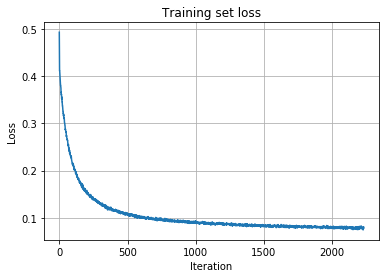

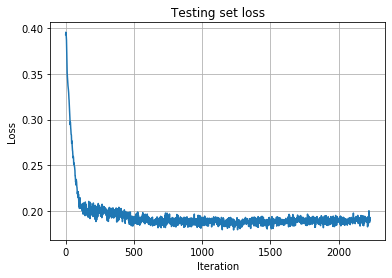

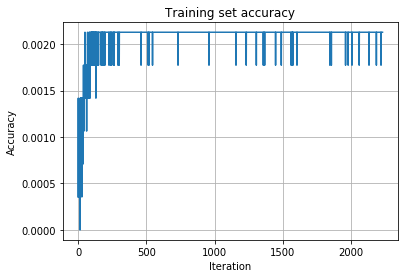

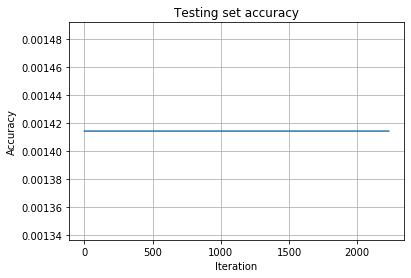

In [11]:
# Plotting loss
plt.figure(0)
plt.title("Training set loss")
plt.plot(range(len(history.history['loss'])), history.history['loss'])
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid()

plt.figure(2)
plt.title("Testing set loss")
plt.plot(range(len(history.history['val_loss'])), history.history['val_loss'])
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid()

# Plotting accuracy
plt.figure(1)
plt.title("Training set accuracy")
plt.plot(range(len(history.history['accuracy'])), history.history['accuracy'])
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.grid()

plt.figure(3)
plt.title("Testing set accuracy")
plt.plot(range(len(history.history['val_accuracy'])), history.history['val_accuracy'])
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.grid()

In [12]:
model.save_weights('data/Models/model_'+str(loss_and_metrics[0])+'_step1.h5')
print("Saved model.")

Saved model.
